#### TODO: 

read about MLP

find dataset and use MLP on it

https://www.kaggle.com/anokas/kuzushiji


## Neural network

Multi-layer Perceptron 
======================

**Multi-layer Perceptron (MLP)** is a supervised learning algorithm that
learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a
dataset, where $m$ is the number of dimensions for input and $o$ is the
number of dimensions for output. Given a set of features
$X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear
function approximator for either classification or regression. It is
different from logistic regression, in that between the input and the
output layer, there can be one or more non-linear layers, called hidden
layers. Figure 1 shows a one hidden layer MLP with scalar output.

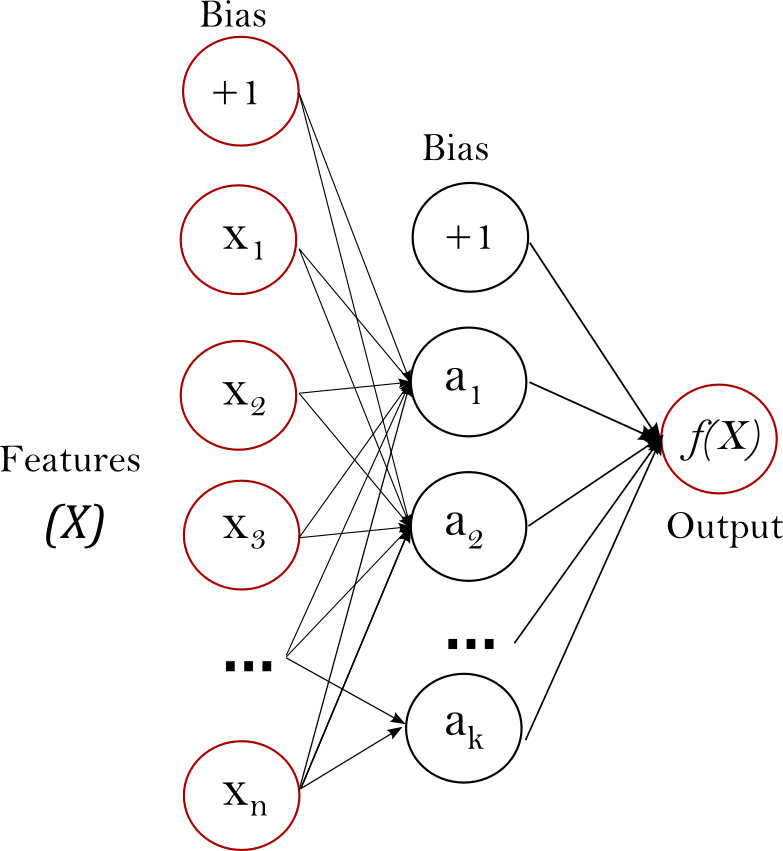


The leftmost layer, known as the input layer, consists of a set of
neurons $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features.
Each neuron in the hidden layer transforms the values from the previous
layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$,
followed by a non-linear activation function $g(\cdot):R \rightarrow R$
- like the hyperbolic tan function. The output layer receives the values
from the last hidden layer and transforms them into output values.

The module contains the public attributes `coefs_` and `intercepts_`.
`coefs_` is a list of weight matrices, where weight matrix at index $i$
represents the weights between layer $i$ and layer $i+1$. `intercepts_`
is a list of bias vectors, where the vector at index $i$ represents the
bias values added to layer $i+1$.

The advantages of Multi-layer Perceptron are:

> -   Capability to learn non-linear models.
> -   Capability to learn models in real-time (on-line learning) using
>     `partial_fit`.

The disadvantages of Multi-layer Perceptron (MLP) include:

> -   MLP with hidden layers have a non-convex loss function where there
>     exists more than one local minimum. Therefore different random
>     weight initializations can lead to different validation accuracy.
> -   MLP requires tuning a number of hyperparameters such as the number
>     of hidden neurons, layers, and iterations.
> -   MLP is sensitive to feature scaling.
Multi-layer Perceptron {#multilayer_perceptron}
======================


Classification
==============

Class `MLPClassifier`{.interpreted-text role="class"} implements a
multi-layer perceptron (MLP) algorithm that trains using
[Backpropagation]

MLP trains on two arrays: array X of size (n_samples, n_features), which
holds the training samples represented as floating point feature
vectors; and array y of size (n_samples,), which holds the target values
(class labels) for the training samples:
```python
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                         hidden_layer_sizes=(5, 2), random_state=1)
    
clf.fit(X, y)
# MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
#                   solver='lbfgs')
```

After fitting (training), the model can predict labels for new samples:
```python
    clf.predict([[2., 2.], [-1., -2.]])
    # array([1, 0])

```
MLP can fit a non-linear model to the training data. `clf.coefs_`
contains the weight matrices that constitute the model parameters:
```python
    [coef.shape for coef in clf.coefs_]
    # [(2, 5), (5, 2), (2, 1)]

```
Currently, `MLPClassifier`{.interpreted-text role="class"} supports only
the Cross-Entropy loss function, which allows probability estimates by
running the `predict_proba` method.

MLP trains using Backpropagation. More precisely, it trains using some
form of gradient descent and the gradients are calculated using
Backpropagation. For classification, it minimizes the Cross-Entropy loss
function, giving a vector of probability estimates $P(y|x)$ per sample
$x$:
```python
    clf.predict_proba([[2., 2.], [1., 2.]])
    # array([[1.967...e-04, 9.998...-01],
    #       [1.967...e-04, 9.998...-01]])

`MLPClassifier`{.interpreted-text role="class"} supports multi-class
classification by applying
[Softmax](https://en.wikipedia.org/wiki/Softmax_activation_function) as
the output function.

Further, the model supports
`multi-label classification <multiclass>`{.interpreted-text role="ref"}
in which a sample can belong to more than one class. For each class, the
raw output passes through the logistic function. Values larger or equal
to [0.5]{.title-ref} are rounded to [1]{.title-ref}, otherwise to
[0]{.title-ref}. For a predicted output of a sample, the indices where
the value is [1]{.title-ref} represents the assigned classes of that
sample:
```python
    X = [[0., 0.], [1., 1.]]
    y = [[0, 1], [1, 1]]
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                         hidden_layer_sizes=(15,), random_state=1)
    
    clf.fit(X, y)
    # MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
    #              solver='lbfgs')
    clf.predict([[1., 2.]])
    # array([[1, 1]])
    clf.predict([[0., 0.]])
    # array([[0, 1]])

```
See the examples below and the docstring of
`MLPClassifier.fit`{.interpreted-text role="meth"} for further
information.

## Visualization of MLP weights on MNIST

Sometimes looking at the learned coefficients of a neural network can provide insight into the learning behavior. For example if weights look unstructured, maybe some were not used at all, or if very large coefficients exist, maybe regularization was too low or the learning rate too high.

This example shows how to plot some of the first layer weights in a MLPClassifier trained on the MNIST dataset.

The input data consists of 28x28 pixel handwritten digits, leading to 784 features in the dataset. Therefore the first layer weight matrix have the shape (784, hidden_layer_sizes[0]). We can therefore visualize a single column of the weight matrix as a 28x28 pixel image.

To make the example run faster, we use very few hidden units, and train only for a very short time. Training longer would result in weights with a much smoother spatial appearance. The example will throw a warning because it doesn’t converge, in this case this is what we want because of CI’s time constraints.



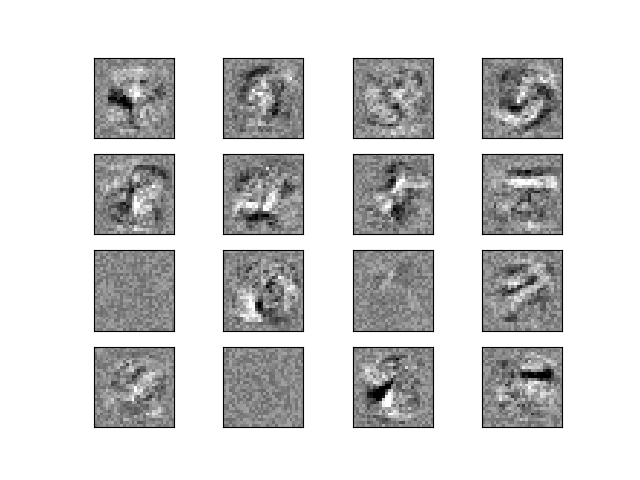

```python
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier


# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

```

Regression
==========

Class `MLPRegressor`{.interpreted-text role="class"} implements a
multi-layer perceptron (MLP) that trains using backpropagation with no
activation function in the output layer, which can also be seen as using
the identity function as activation function. Therefore, it uses the
square error as the loss function, and the output is a set of continuous
values.

`MLPRegressor`{.interpreted-text role="class"} also supports
multi-output regression, in which a sample can have more than one
target.

Regularization
==============

Both `MLPRegressor`{.interpreted-text role="class"} and
`MLPClassifier`{.interpreted-text role="class"} use parameter `alpha`
for regularization (L2 regularization) term which helps in avoiding
overfitting by penalizing weights with large magnitudes. Following plot
displays varying decision function with value of alpha.

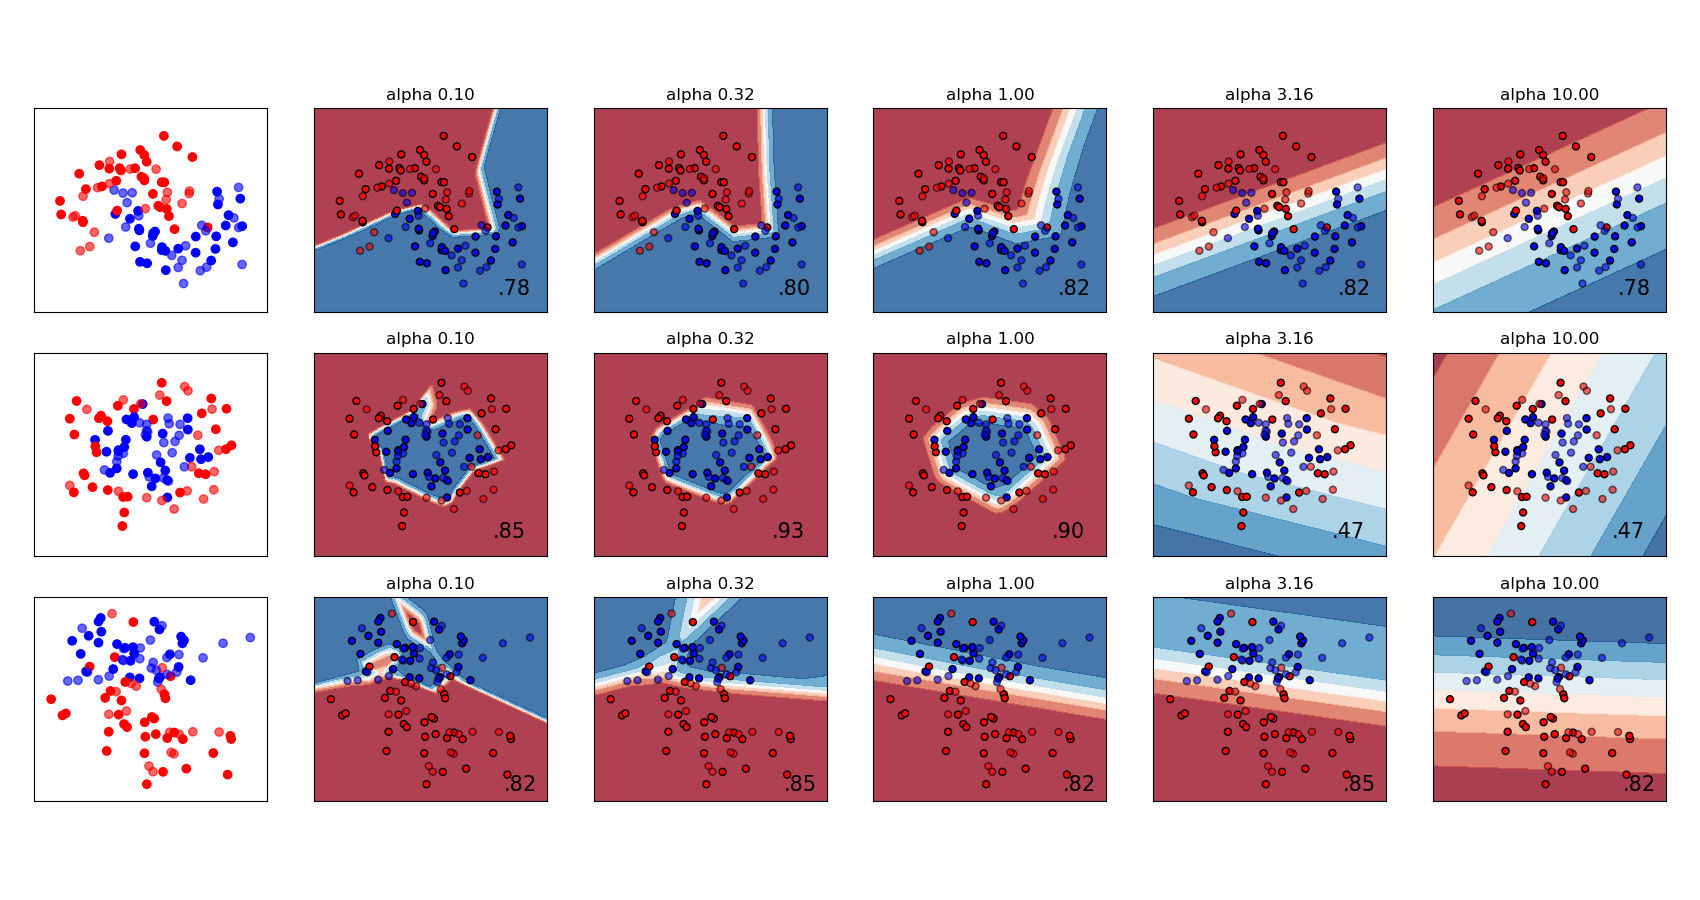

See the examples below for further information.


Algorithms
==========

MLP trains using [Stochastic Gradient
Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent),
[Adam](https://arxiv.org/abs/1412.6980), or
[L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS). Stochastic
Gradient Descent (SGD) updates parameters using the gradient of the loss
function with respect to a parameter that needs adaptation, i.e.

$$w \leftarrow w - \eta (\alpha \frac{\partial R(w)}{\partial w}
+ \frac{\partial Loss}{\partial w})$$

where $\eta$ is the learning rate which controls the step-size in the
parameter space search. $Loss$ is the loss function used for the
network.

More details can be found in the documentation of
[SGD](http://scikit-learn.org/stable/modules/sgd.html)

Adam is similar to SGD in a sense that it is a stochastic optimizer, but
it can automatically adjust the amount to update parameters based on
adaptive estimates of lower-order moments.

With SGD or Adam, training supports online and mini-batch learning.

L-BFGS is a solver that approximates the Hessian matrix which represents
the second-order partial derivative of a function. Further it
approximates the inverse of the Hessian matrix to perform parameter
updates. The implementation uses the Scipy version of
[L-BFGS](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_l_bfgs_b.html).

If the selected solver is \'L-BFGS\', training does not support online
nor mini-batch learning.

Complexity
==========

Suppose there are $n$ training samples, $m$ features, $k$ hidden layers,
each containing $h$ neurons - for simplicity, and $o$ output neurons.
The time complexity of backpropagation is
$O(n\cdot m \cdot h^k \cdot o \cdot i)$, where $i$ is the number of
iterations. Since backpropagation has a high time complexity, it is
advisable to start with smaller number of hidden neurons and few hidden
layers for training.

Mathematical formulation
========================

Given a set of training examples
$(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)$ where
$x_i \in \mathbf{R}^n$ and $y_i \in \{0, 1\}$, a one hidden layer one
hidden neuron MLP learns the function
$f(x) = W_2 g(W_1^T x + b_1) + b_2$ where $W_1 \in \mathbf{R}^m$ and
$W_2, b_1, b_2 \in \mathbf{R}$ are model parameters. $W_1, W_2$
represent the weights of the input layer and hidden layer, respectively;
and $b_1, b_2$ represent the bias added to the hidden layer and the
output layer, respectively. $g(\cdot) : R \rightarrow R$ is the
activation function, set by default as the hyperbolic tan. It is given
as,

$$g(z)= \frac{e^z-e^{-z}}{e^z+e^{-z}}$$

For binary classification, $f(x)$ passes through the logistic function
$g(z)=1/(1+e^{-z})$ to obtain output values between zero and one. A
threshold, set to 0.5, would assign samples of outputs larger or equal
0.5 to the positive class, and the rest to the negative class.

If there are more than two classes, $f(x)$ itself would be a vector of
size (n_classes,). Instead of passing through logistic function, it
passes through the softmax function, which is written as,

$$\text{softmax}(z)_i = \frac{\exp(z_i)}{\sum_{l=1}^k\exp(z_l)}$$

where $z_i$ represents the $i$ th element of the input to softmax, which
corresponds to class $i$, and $K$ is the number of classes. The result
is a vector containing the probabilities that sample $x$ belong to each
class. The output is the class with the highest probability.

In regression, the output remains as $f(x)$; therefore, output
activation function is just the identity function.

MLP uses different loss functions depending on the problem type. The
loss function for classification is Cross-Entropy, which in binary case
is given as,

$$Loss(\hat{y},y,W) = -y \ln {\hat{y}} - (1-y) \ln{(1-\hat{y})} + \alpha ||W||_2^2$$

where $\alpha ||W||_2^2$ is an L2-regularization term (aka penalty) that
penalizes complex models; and $\alpha > 0$ is a non-negative
hyperparameter that controls the magnitude of the penalty.

For regression, MLP uses the Square Error loss function; written as,

$$Loss(\hat{y},y,W) = \frac{1}{2}||\hat{y} - y ||_2^2 + \frac{\alpha}{2} ||W||_2^2$$

Starting from initial random weights, multi-layer perceptron (MLP)
minimizes the loss function by repeatedly updating these weights. After
computing the loss, a backward pass propagates it from the output layer
to the previous layers, providing each weight parameter with an update
value meant to decrease the loss.

In gradient descent, the gradient $\nabla Loss_{W}$ of the loss with
respect to the weights is computed and deducted from $W$. More formally,
this is expressed as,

$$W^{i+1} = W^i - \epsilon \nabla {Loss}_{W}^{i}$$

where $i$ is the iteration step, and $\epsilon$ is the learning rate
with a value larger than 0.

The algorithm stops when it reaches a preset maximum number of
iterations; or when the improvement in loss is below a certain, small
number.

Tips on Practical Use 
=====================

> -   Multi-layer Perceptron is sensitive to feature scaling, so it is
>     highly recommended to scale your data. For example, scale each
>     attribute on the input vector X to \[0, 1\] or \[-1, +1\], or
>     standardize it to have mean 0 and variance 1. Note that you must
>     apply the *same* scaling to the test set for meaningful results.
>     You can use `StandardScaler`{.interpreted-text role="class"} for
>     standardization.
>
>     > \>\>\> from sklearn.preprocessing import StandardScaler \#
>     > doctest: +SKIP \>\>\> scaler = StandardScaler() \# doctest:
>     > +SKIP \>\>\> \# Don\'t cheat - fit only on training data \>\>\>
>     > scaler.fit(X_train) \# doctest: +SKIP \>\>\> X_train =
>     > scaler.transform(X_train) \# doctest: +SKIP \>\>\> \# apply same
>     > transformation to test data \>\>\> X_test =
>     > scaler.transform(X_test) \# doctest: +SKIP
>
>     An alternative and recommended approach is to use
>     `StandardScaler`{.interpreted-text role="class"} in a
>     `Pipeline`{.interpreted-text role="class"}
>
> -   Finding a reasonable regularization parameter $\alpha$ is best
>     done using `GridSearchCV`{.interpreted-text role="class"}, usually
>     in the range `10.0 ** -np.arange(1, 7)`.
>
> -   Empirically, we observed that [L-BFGS]{.title-ref} converges
>     faster and with better solutions on small datasets. For relatively
>     large datasets, however, [Adam]{.title-ref} is very robust. It
>     usually converges quickly and gives pretty good performance.
>     [SGD]{.title-ref} with momentum or nesterov\'s momentum, on the
>     other hand, can perform better than those two algorithms if
>     learning rate is correctly tuned.

More control with warm_start
============================

If you want more control over stopping criteria or learning rate in SGD,
or want to do additional monitoring, using `warm_start=True` and
`max_iter=1` and iterating yourself can be helpful:

```python
    X = [[0., 0.], [1., 1.]]
    y = [0, 1]
    clf = MLPClassifier(hidden_layer_sizes=(15,), random_state=1, max_iter=1, warm_start=True)
    for i in range(10):
        clf.fit(X, y)
        # additional monitoring / inspection
    # MLPClassifier(...
```


## What is Reinforcement Learning?
Say, we have an agent in an unknown environment and this agent can obtain some rewards by interacting with the environment. The agent ought to take actions so as to maximize cumulative rewards. In reality, the scenario could be a bot playing a game to achieve high scores, or a robot trying to complete physical tasks with physical items; and not just limited to these.

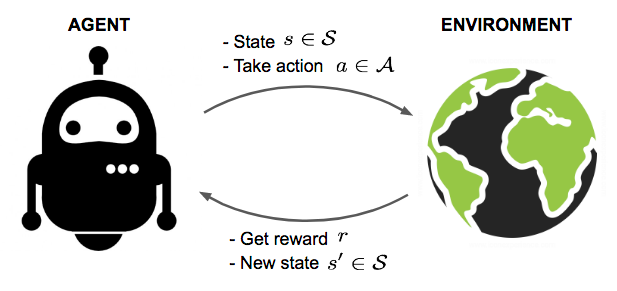

An agent interacts with the environment, trying to take smart actions to maximize cumulative rewards.

The goal of Reinforcement Learning (RL) is to learn a good strategy for the agent from experimental trials and relative simple feedback received. With the optimal strategy, the agent is capable to actively adapt to the environment to maximize future rewards.

## Key Concepts

Now Let’s formally define a set of key concepts in RL.

The agent is acting in an environment. How the environment reacts to certain actions is defined by a model which we may or may not know. The agent can stay in one of many states (s∈S) of the environment, and choose to take one of many actions (a∈A) to switch from one state to another. Which state the agent will arrive in is decided by transition probabilities between states (P). Once an action is taken, the environment delivers a reward (r∈R) as feedback.

The model defines the reward function and transition probabilities. We may or may not know how the model works and this differentiate two circumstances:
* Know the model: planning with perfect information; do model-based RL. When we fully know the environment, we can find the optimal solution by Dynamic Programming (DP).
* Does not know the model: learning with incomplete information; do model-free RL or try to learn the model explicitly as part of the algorithm. Most of the following content serves the scenarios when the model is unknown.


The agent’s policy π(s) provides the guideline on what is the optimal action to take in a certain state with the goal to maximize the total rewards. Each state is associated with a value function V(s) predicting the expected amount of future rewards we are able to receive in this state by acting the corresponding policy. In other words, the value function quantifies how good a state is. Both policy and value functions are what we try to learn in reinforcement learning.


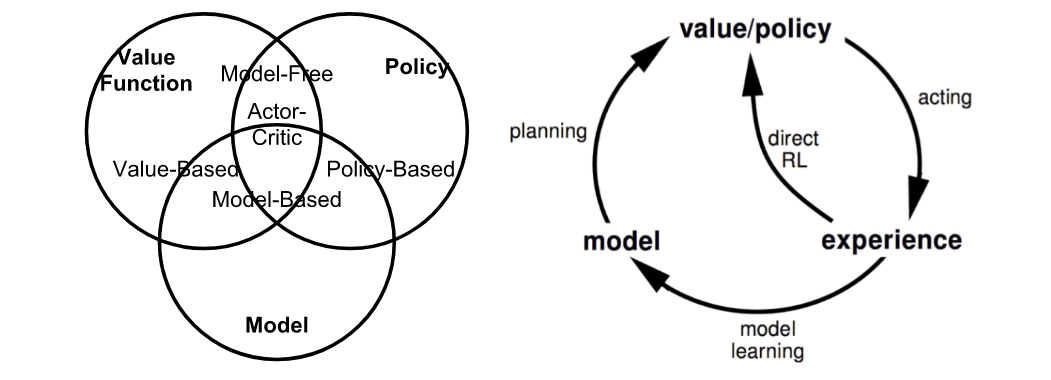


 Summary of approaches in RL based on whether we want to model the value, policy, or the environment.
 
 
 The interaction between the agent and the environment involves a sequence of actions and observed rewards in time, t=1,2,…,T. During the process, the agent accumulates the knowledge about the environment, learns the optimal policy, and makes decisions on which action to take next so as to efficiently learn the best policy. Let’s label the state, action, and reward at time step t as St, At, and Rt, respectively. Thus the interaction sequence is fully described by one episode (also known as “trial” or “trajectory”) and the sequence ends at the terminal state ST:

$$S_1,A_1,R_2,S_2,A_2, \dots ,S_T$$

Terms you will encounter a lot when diving into different categories of RL algorithms:


* Model-based: Rely on the model of the environment; either the model is known or the algorithm learns it explicitly.
* Model-free: No dependency on the model during learning.
* On-policy: Use the deterministic outcomes or samples from the target policy to train the algorithm.
* Off-policy: Training on a distribution of transitions or episodes produced by a different behavior policy rather than that produced by the target policy.




## Model: Transition and Reward
The model is a descriptor of the environment. With the model, we can learn or infer how the environment would interact with and provide feedback to the agent. The model has two major parts, transition probability function P and reward function R.

Let’s say when we are in state s, we decide to take action a to arrive in the next state s’ and obtain reward r. This is known as one transition step, represented by a tuple (s, a, s’, r).

The transition function P records the probability of transitioning from state s to s’ after taking action a while obtaining reward r. We use P as a symbol of “probability”.

$$P(s′,r|s,a)=P[St+1=s′,Rt+1=r|St=s,At=a]$$

Thus the state-transition function can be defined as a function of P(s′,r|s,a):

$$Pass′=P(s′|s,a)=P[St+1=s′|St=s,At=a]=∑r∈RP(s′,r|s,a)$$

The reward function R predicts the next reward triggered by one action:

$$R(s,a)=E[Rt+1|St=s,At=a]=∑r∈Rr∑s′∈SP(s′,r|s,a)$$

## Policy

Policy, as the agent’s behavior function π, tells us which action to take in state s. It is a mapping from state s to action a and can be either deterministic or stochastic:

* Deterministic: $π(s)=a$.
* Stochastic: $π(a|s)=Pπ[A=a|S=s]$.

## Value Function

Value function measures the goodness of a state or how rewarding a state or an action is by a prediction of future reward. The future reward, also known as return, is a total sum of discounted rewards going forward. Let’s compute the return Gt starting from time t:
$$
Gt=Rt+1+γRt+2+⋯=∑k=0∞γkRt+k+1
$$
The discounting factor γ∈[0,1] penalize the rewards in the future, because:

The future rewards may have higher uncertainty; i.e. stock market.
The future rewards do not provide immediate benefits; i.e. As human beings, we might prefer to have fun today rather than 5 years later ;).
Discounting provides mathematical convenience; i.e., we don’t need to track future steps forever to compute return.
We don’t need to worry about the infinite loops in the state transition graph.
The state-value of a state s is the expected return if we are in this state at time t, St=s:
$$
Vπ(s)=Eπ[Gt|St=s]
$$
Similarly, we define the action-value (“Q-value”; Q as “Quality” I believe?) of a state-action pair as:

$$
Qπ(s,a)=Eπ[Gt|St=s,At=a]
$$
Additionally, since we follow the target policy π, we can make use of the probility distribution over possible actions and the Q-values to recover the state-value:
$$
Vπ(s)=∑a∈AQπ(s,a)π(a|s)
$$
The difference between action-value and state-value is the action advantage function (“A-value”):
$$
Aπ(s,a)=Qπ(s,a)−Vπ(s)
$$
## Optimal Value and Policy
The optimal value function produces the maximum return:

$$
V∗(s)=maxπVπ(s),Q∗(s,a)=maxπQπ(s,a)
$$
The optimal policy achieves optimal value functions:
$$
π∗=argmaxπVπ(s),π∗=argmaxπQπ(s,a)
$$
And of course, we have $$ Vπ∗(s)=V∗(s) and Qπ∗(s,a)=Q∗(s,a).$$


## Exploration-Exploitation Dilemma
The exploration vs exploitation dilemma exists in many aspects of our life. Say, your favorite restaurant is right around the corner. If you go there every day, you would be confident of what you will get, but miss the chances of discovering an even better option. If you try new places all the time, very likely you are gonna have to eat unpleasant food from time to time. Similarly, online advisors try to balance between the known most attractive ads and the new ads that might be even more successful.
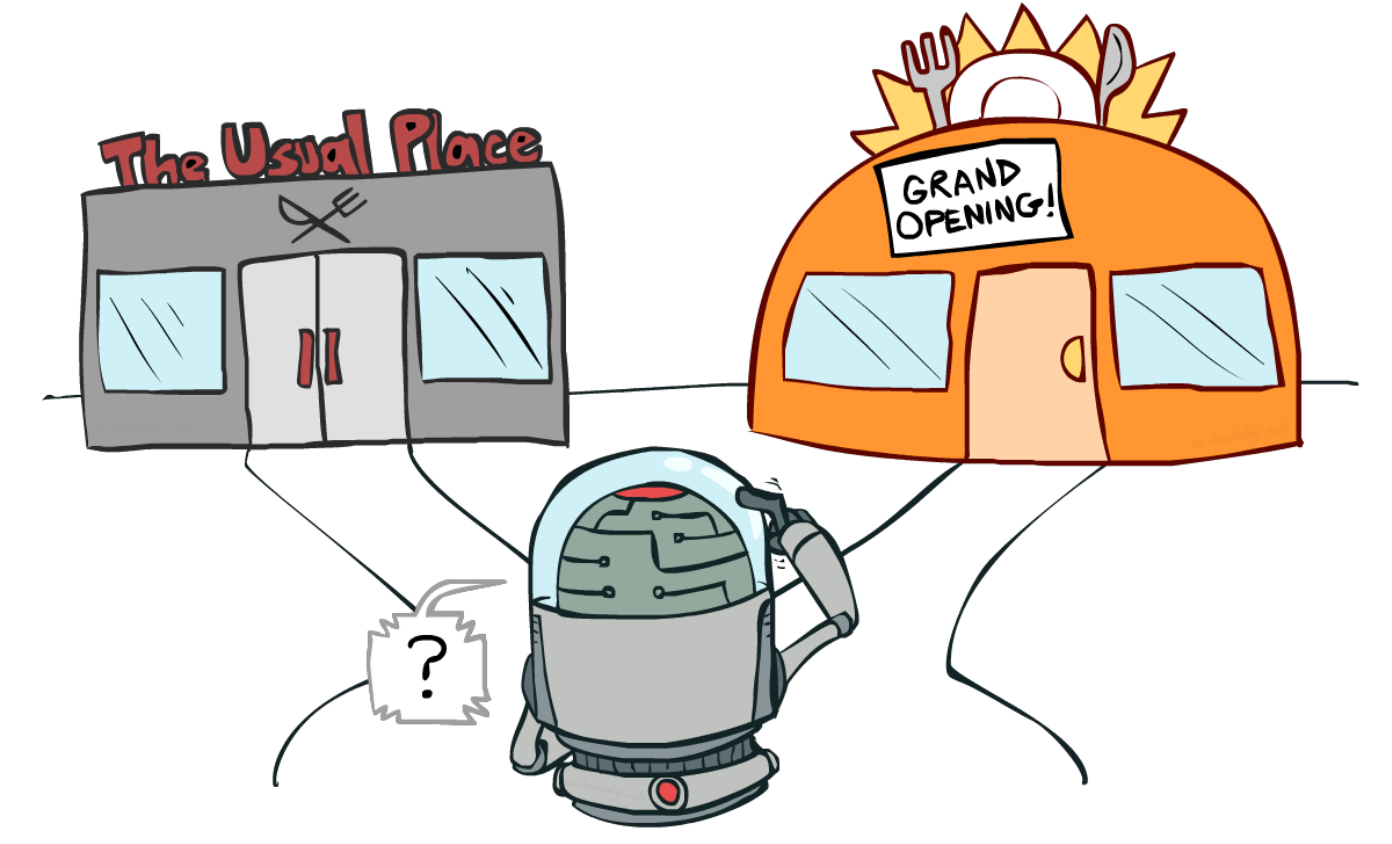
If we have learned all the information about the environment, we are able to find the best strategy by even just simulating brute-force, let alone many other smart approaches. The dilemma comes from the incomplete information: we need to gather enough information to make best overall decisions while keeping the risk under control. With exploitation, we take advantage of the best option we know. With exploration, we take some risk to collect information about unknown options. The best long-term strategy may involve short-term sacrifices. For example, one exploration trial could be a total failure, but it warns us of not taking that action too often in the future.

When the RL problem faces an unknown environment, this issue is especially a key to finding a good solution: without enough exploration, we cannot learn the environment well enough; without enough exploitation, we cannot complete our reward optimization task.

Different RL algorithms balance between exploration and exploitation in different ways. In MC methods, Q-learning or many on-policy algorithms, the exploration is commonly implemented by ε-greedy; In ES, the exploration is captured by the policy parameter perturbation. Please keep this into consideration when develop a new RL algorithm.

```python


#!pip install gym[atari]
#!wget -O space_invaders.bin https://github.com/orcax/atari_roms/blob/master/space_invaders.bin?raw=true
#!pwd | xargs python3 -m atari_py.import_roms 
import gym
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image as Image
import time

display_handle=display(None, display_id=True)


env = gym.make('SpaceInvaders-ram-v0')
env.reset()


for _ in range(1000):
    img = env.render(mode="rgb_array")
    img=PILImage.fromarray(img)
    
    # Image Resize and display Image
    basewidth = 500
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth,hsize), Image.ANTIALIAS)
    display_handle.update(img)
    
    
    out=env.step(env.action_space.sample()) # take a random action
    
    time.sleep(0.01)
    
env.close()
display_handle.update(None)
```

## Deep Q Learning

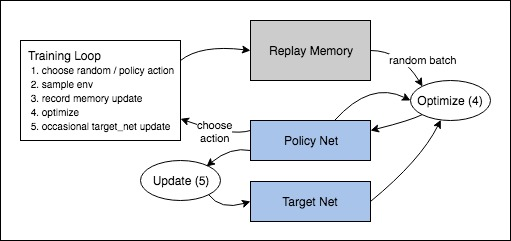
## Introduction

Reinforcement learning (RL) is a general framework where agents learn to perform actions in an environment so as to maximize a reward. The two main components are the environment, which represents the problem to be solved, and the agent, which represents the learning algorithm.

The agent and environment continuously interact with each other. At each time step, the agent takes an action on the environment based on its *policy* $\pi(a_t|s_t)$, where $s_t$ is the current observation from the environment, and receives a reward $r_{t+1}$ and the next observation $s_{t+1}$ from the environment. The goal is to improve the policy so as to maximize the sum of rewards (return).

Note: It is important to distinguish between the `state` of the environment and the `observation`, which is the part of the environment `state` that the agent can see, e.g. in a poker game, the environment state consists of the cards belonging to all the players and the community cards, but the agent can observe only its own cards and a few community cards. In most literature, these terms are used interchangeably and observation is also denoted as $s$.

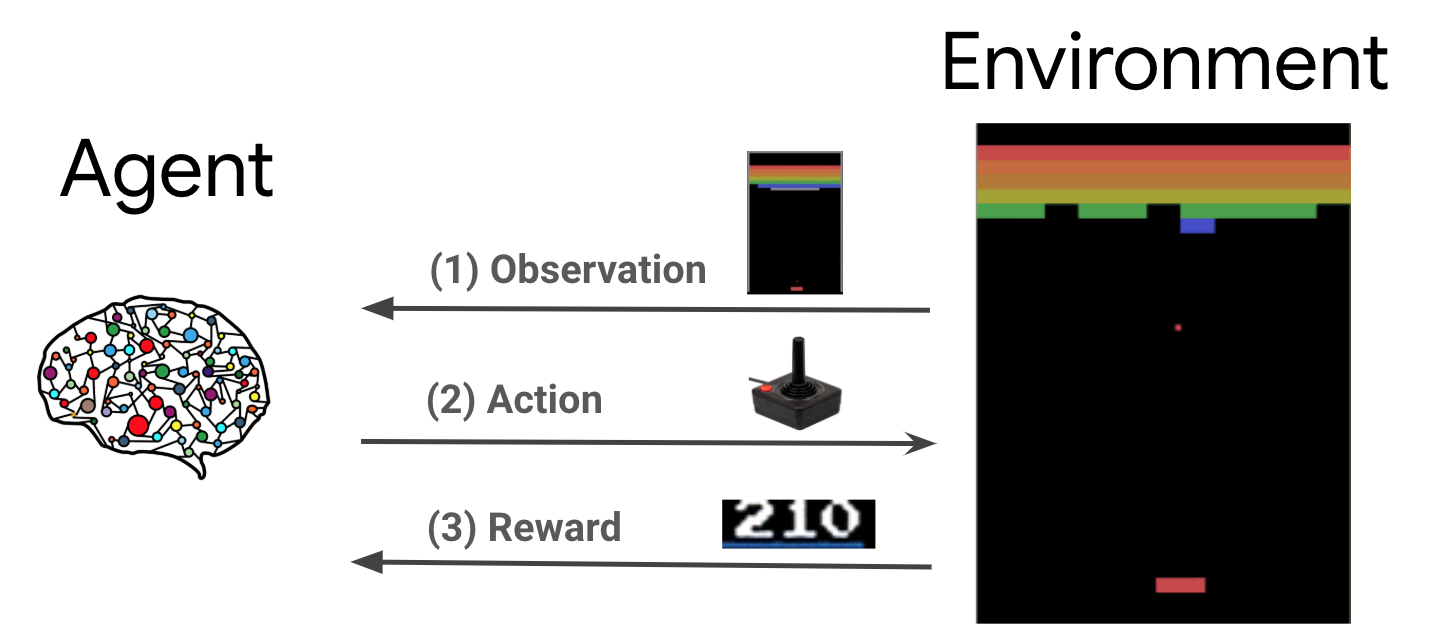

This is a very general framework and can model a variety of sequential decision making problems such as games, robotics etc. 

## The Space Invader Environment

Space Invaders is a fixed shooter in which the player moves a laser cannon horizontally across the bottom of the screen and fires at aliens overhead. The aliens begin as five rows of eleven that move left and right as a group, shifting downward each time they reach a screen edge. The goal is to eliminate all of the aliens by shooting them. While the player has three lives, the game ends immediately if the invaders reach the bottom of the screen. The aliens attempt to destroy the player's cannon by firing projectiles. The laser cannon is partially protected by stationary defense bunkers which are gradually destroyed from the top by the aliens and, if the player fires when beneath one, the bottom.

*   The observation from the environment $s_t$ is a vector of size 128 representing RAM Bytes of the game in computer memory.
*   The agent can control the system by taking one of 6 actions $a_t$:  The actions are {FIRE (shoot without moving), RIGHT (move right), LEFT (move left), RIGHTFIRE (shoot and move right), LEFTFIRE (shoot and move left), NOOP (no operation)}. 
*   A reward $r_{t+1} = score$ is provided at each timestep that represents the in-game reward of the game.  Each game screen starts with five rows of 11 invaders. The bottom 2 rows score 10 points per large invader (A), the middle 2 rows 20 points for each medium invader (B) and the top row scores 30 points for each small invader (C). This makes each screen worth a total of 990 points. The score for each screen can be dramatically increased by the tactical destruction of the 'mystery' value spaceships (G) that frequently fly from one side of the screen to the other. Temporary sanctuary can be sought beneath the 4 base shelters (E).


The goal of the agent is to learn a policy $\pi(a_t|s_t)$ so as to maximize the sum of rewards in an episode $\sum_{t=0}^{T} \gamma^t r_t$. Here $\gamma$ is a discount factor in $[0, 1]$ that discounts future rewards relative to immediate rewards. This parameter helps us focus the policy, making it care more about obtaining rewards quickly.

## The DQN Agent

The  [DQN (Deep Q-Network) algorithm](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf) was developed by DeepMind in 2015. It was able to solve a wide range of Atari games (some to superhuman level) by combining reinforcement learning and deep neural networks at scale. The algorithm was developed by enhancing a classic RL algorithm called Q-Learning with deep neural networks and a technique called *experience replay*.

### Q-Learning

Q-Learning is based on the notion of a Q-function. The Q-function (a.k.a the state-action value function) of a policy $\pi$, $Q^{\pi}(s, a)$, measures the expected return or discounted sum of rewards obtained from state $s$ by taking action $a$ first and following policy $\pi$ thereafter. We define the optimal Q-function $Q^*(s, a)$ as the maximum return that can be obtained starting from observation $s$, taking action $a$ and following the optimal policy thereafter. The optimal Q-function obeys the following *Bellman* optimality equation: 

$\begin{equation}Q^\ast(s, a) = \mathbb{E}[ r + \gamma \max_{a'} Q^\ast(s', a') ]\end{equation}$

This means that the maximum return from state $s$ and action $a$ is the sum of the immediate reward $r$ and the return (discounted by $\gamma$) obtained by following the optimal policy thereafter until the end of the episode (i.e., the maximum reward from the next state $s'$). The expectation is computed both over the distribution of immediate rewards $r$ and possible next states $s'$.

The basic idea behind Q-Learning is to use the Bellman optimality equation as an iterative update $Q_{i+1}(s, a) \leftarrow \mathbb{E}\left[ r + \gamma \max_{a'} Q_{i}(s', a')\right]$, and it can be shown that this converges to the optimal $Q$-function, i.e. $Q_i \rightarrow Q^*$ as $i \rightarrow \infty$ (see the [DQN paper](https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf)).


### Deep Q-Learning

For most problems, it is impractical to represent the $Q$-function as a table containing values for each combination of $s$ and $a$. Instead, we train a function approximator, such as a neural network with parameters $\theta$, to estimate the Q-values, i.e. $Q(s, a; \theta) \approx Q^*(s, a)$. This can done by minimizing the following loss at each step $i$:

$\begin{equation}L_i(\theta_i) = \mathbb{E}_{s, a, r, s'\sim \rho(.)} \left[ (y_i - Q(s, a; \theta_i))^2 \right]\end{equation}$ where $y_i = r +  \gamma \max_{a'} Q(s', a'; \theta_{i-1})$

Here, $y_i$ is called the TD (temporal difference) target, and $y_i - Q$ is called the TD error. $\rho$ represents the behaviour distribution, the distribution over transitions $\{s, a, r, s'\}$ collected from the environment. 

Note that the parameters from the previous iteration $\theta_{i-1}$ are fixed and not updated. In practice we use a snapshot of the network parameters from a few iterations ago instead of the last iteration. This copy is called the *target network*.

Q-Learning is an *off-policy* algorithm that learns about the greedy policy $a = \max_{a} Q(s, a; \theta)$ while using a different behaviour policy for acting in the environment/collecting data. This behaviour policy is usually an $\epsilon$-greedy policy that selects the greedy action with probability $1-\epsilon$ and a random action with probability $\epsilon$ to ensure good coverage of the state-action space.

### Experience Replay

To avoid computing the full expectation in the DQN loss, we can minimize it using stochastic gradient descent. If the loss is computed using just the last transition $\{s, a, r, s'\}$, this reduces to standard Q-Learning. 

The Atari DQN work introduced a technique called Experience Replay to make the network updates more stable. At each time step of data collection, the transitions are added to a circular buffer called the *replay buffer*. Then during training, instead of using just the latest transition to compute the loss and its gradient, we compute them using a mini-batch of transitions sampled from the replay buffer. This has two advantages: better data efficiency by reusing each transition in many updates, and better stability using uncorrelated transitions in a batch.



## Train the Agent
```python
import gym
import collections
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#Hyperparameters
learning_rate = 0.002
gamma         = 0.98
buffer_limit  = 100000
batch_size    = 128

class ReplayBuffer():
    def __init__(self):
        self.buffer = collections.deque(maxlen=buffer_limit)
    
    def put(self, transition):
        self.buffer.append(transition)
    
    def sample(self, n):
        mini_batch = random.sample(self.buffer, n)
        s_lst, a_lst, r_lst, s_prime_lst, done_mask_lst = [], [], [], [], []
        
        for transition in mini_batch:
            s, a, r, s_prime, done_mask = transition
            s_lst.append(s)
            a_lst.append([a])
            r_lst.append([r])
            s_prime_lst.append(s_prime)
            done_mask_lst.append([done_mask])

        return torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
               torch.tensor(r_lst), torch.tensor(s_prime_lst, dtype=torch.float), \
               torch.tensor(done_mask_lst)
    
    def size(self):
        return len(self.buffer)

        

class Qnet(nn.Module):
    def __init__(self, env_size,action_space):
        super(Qnet, self).__init__()
        self.fc1 = nn.Linear(env_size, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, action_space)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
      
    def sample_action(self, obs, epsilon):
        out = self.forward(obs)
        coin = random.random()
        if coin < epsilon:
            return random.randint(0,1)
        else : 
            return out.argmax().item()
            
def train(q, q_target, memory, optimizer):
    for i in range(10):
        s,a,r,s_prime,done_mask = memory.sample(batch_size)

        q_out = q(s.to("cuda"))
        q_a = q_out.gather(1,a.to("cuda"))
        max_q_prime = q_target(s_prime).max(1)[0].unsqueeze(1)
        target = r + gamma * max_q_prime * done_mask
        loss = F.smooth_l1_loss(q_a, target.to("cuda"))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
env = gym.make('SpaceInvaders-ram-v0')
env.reset()
env_size=env.observation_space.shape[0]
action_space=int(env.action_space.n)
q = Qnet(env_size,action_space)

q.to("cuda")
q_target = Qnet(env_size,action_space)
q_target.load_state_dict(q.state_dict())
memory = ReplayBuffer()

print_interval = 20
score = 0.0  
optimizer = optim.Adam(q.parameters(), lr=learning_rate)

for n_epi in range(10000):
    epsilon = max(0.01, 0.08 - 0.01*(n_epi/200)) #Linear annealing from 8% to 1%
    s = env.reset()
    done = False

    while not done:
        
        a = q.sample_action(torch.from_numpy(s).float().to("cuda"), epsilon)      
        s_prime, r, done, info = env.step(a)
        done_mask = 0.0 if done else 1.0
        memory.put((s,a,r/100.0,s_prime, done_mask))
        s = s_prime

        score += r
        if done:
            break

    if memory.size()>2000:
        train(q, q_target, memory, optimizer)

    if n_epi%print_interval==0 and n_epi!=0:
        q_target.load_state_dict(q.state_dict())
        print("n_episode :{}, score : {:.1f}, n_buffer : {}, eps : {:.1f}%".format(
                                                        n_epi, score/print_interval, memory.size(), epsilon*100))
        score = 0.0
env.close()
torch.save(q.state_dict(),"dqn_agent_%s"%n_epi)
```

## Play the Game
```python
import gym
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
import time

display_handle=display(None, display_id=True)


env = gym.make('SpaceInvaders-ram-v0')


for _ in range(10):
    
    done=False
    
    s=env.reset()
    while not done:
        img = env.render(mode="rgb_array")
        img=Image.fromarray(img)

        # Image Resize and display Image
        basewidth = 500
        wpercent = (basewidth/float(img.size[0]))
        hsize = int((float(img.size[1])*float(wpercent)))
        img = img.resize((basewidth,hsize), Image.ANTIALIAS)
        display_handle.update(img)
        a=torch.argmax(q(torch.from_numpy(s).float().to("cuda")))
        s, r, done, info = env.step(a)
```        

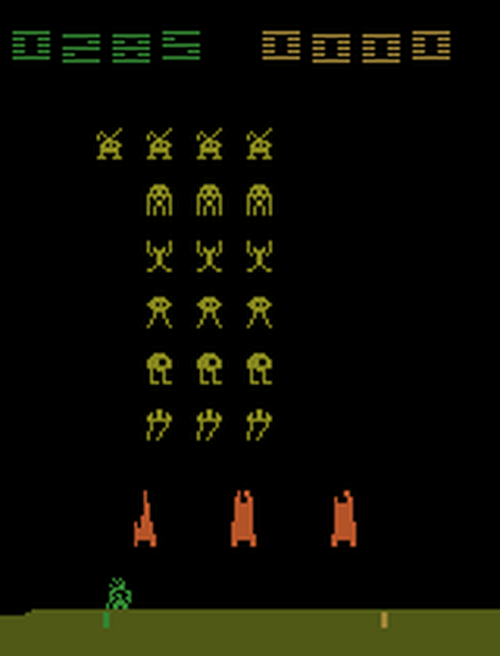